##### Objective:
* COVID-19 has profound disruptive effects on the global ecconmy.It reduces number of workers in the workforce,and therefore reduces the global supply of goods. Travel was banned. Schools have been closed. Stock market has been cracked. People are panic. 

* This study uses datasets from Kaggal, working in hope it can shed light into answer some questions. How it starts; when it happened, who are affected. Which country got worse, which age groups are vulnerable to the disease. Who are suceptible to the disease: men or women?...etc, its trending on China, and other countries such as Italy, South Korea, Spain, and the USA.

##### Import library packages and upload the files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

##### Upload files + verify columns + clean data

In [2]:
df = pd.read_csv('COVID19_line_list_data.csv')
df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop meaningless/unneeded columns
df.drop(['Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23', 
                 'Unnamed: 24','Unnamed: 25','Unnamed: 26'], axis=1,inplace = True)

In [4]:
df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...


In [5]:
df.dropna().head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
241,242,6.0,1/28/2020,new confirmed COVID-19 patient in Japan: 1/28-...,Nara Prefecture,Japan,male,65.0,1/14/2020,0.0,1/17/2020,01/08/20,1/16/2020,0,0.0,0,0,"cough, chills, joint pain",Kyodo News,https://english.kyodonews.net/news/2020/01/e8f...
243,244,8.0,1/29/2020,new confirmed COVID-19 patient in Japan: femal...,Osaka Prefecture,Japan,female,45.0,1/20/2020,0.0,1/20/2020,01/12/20,1/17/2020,0,0.0,0,0,"fever, cough",NHK World-Japan,https://www3.nhk.or.jp/nhkworld/en/news/202001...


Text(0.5, 1.0, 'Age Distribution in Covid-19 Patients')

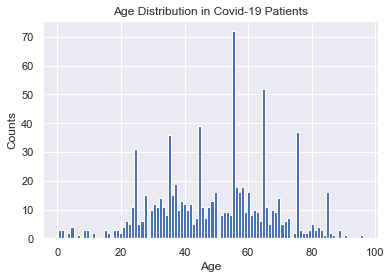

In [6]:
# Plot age distribution in patients with coronavirus
df['age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution in Covid-19 Patients')

In [7]:
print(f" The average age of patients with Coronavirus is {round(df['age'].mean())} years old")
print(f" The median age of patients with Coronavirus is {round(df['age'].median())} years old")
print(f" The youngest  patients with Coronavirus is {round(df['age'].min())} years old")
print(f" The oldest patients with Coronavirus is {round(df['age'].max())} years old")

 The average age of patients with Coronavirus is 49 years old
 The median age of patients with Coronavirus is 51 years old
 The youngest  patients with Coronavirus is 0 years old
 The oldest patients with Coronavirus is 96 years old


##### Key Takeaways:
* The average age of patients with Coronavirus is 49 years old.

* The youngest patient(s) with Coronavirus are infant(s) - o years old

* The oldest patient(s) are 96 years old

Text(0.5, 1.0, 'Gender vs Covid-19')

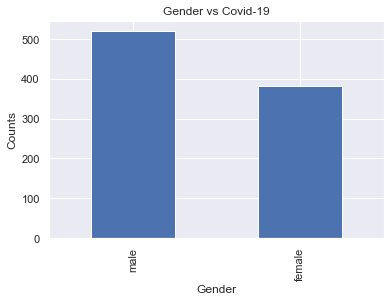

In [8]:
# plot gender distribution between gender
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender vs Covid-19')

##### Note: Men are more succeptible to Covid-19 than women

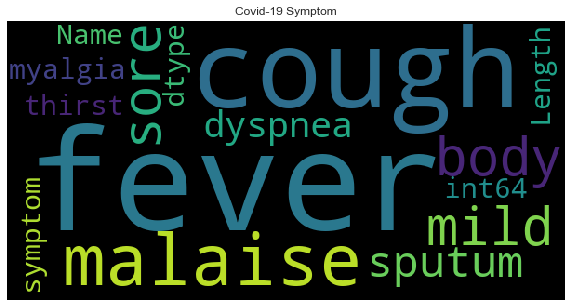

In [9]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = df['symptom'].value_counts() 
plt.figure(figsize=(10,6))
wordcloud=WordCloud(background_color='black',mode="RGB", width=600 , height=300).generate(str(text))
plt.title("Covid-19 Symptom")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Coronavirus Symptom:
    * Cough
    * Fever
    * Sore throat
    * Vomiting
    * Diarrhea
    * Chills
    * Fatigue
    * Sputum
    * Myalgias Muscle
    * Pain

In [10]:
df2 = pd.read_csv('covid_19_data.csv')
df2.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [11]:
### Create 'Active' column by subtract 'Deaths' and 'Recovered' from 'Confirmed'
df2['Active'] = df2['Confirmed'] - df2['Deaths'] - df2['Recovered']
df2.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0


In [12]:
df2.drop(['SNo'], axis =1).head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


In [13]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

confirmed_country = df2.groupby('Country/Region').sum()['Confirmed'].sort_values(ascending = False)
data = [dict(
        type='choropleth',
        locations= confirmed_country.index,
        locationmode='country names',
        z=confirmed_country.values,
        text=confirmed_country.index,
        colorscale = [[0,'rgb(255, 120, 120)'],[1,'rgb(255, 180, 240)']],
        reversescale=True,
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Number of Cases'),
)]
layout = dict(title = 'Countries with COVID-19', 
        geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=50, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
iplot(fig, validate=False, filename='Coronavirus-19')


#### Look for a Trend in various situations: Confirmed, Deaths, Recovered, ActiveCases

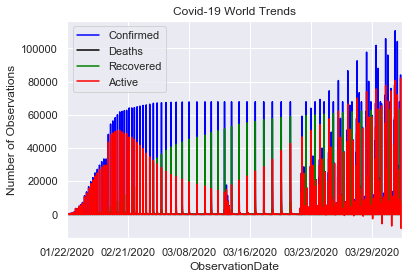

In [14]:
df2.plot(kind='line',x='ObservationDate',
              y=['Confirmed','Deaths','Recovered','Active'],
              color = ['blue','black','green','red'])
plt.title('Covid-19 World Trends')
plt.ylabel('Number of Observations')
plt.show()

In [15]:
start_date = df2.iloc[df2.first_valid_index()]['ObservationDate']
end_date = df2.iloc[df2.last_valid_index()]['ObservationDate']
print(f"{start_date} is the beginning and {end_date} is the latest date for this data set")

01/22/2020 is the beginning and 04/01/2020 is the latest date for this data set


##### Key Takeaways:
* There are 156 countries that are affected by Covid-19
* The start date and end date for this dataset are from 1/22/20 - 04/01/20 respectively (7 weeks)
* Confirmed cases start very low at the beginning of Feb,and increase sharply thereafter. It levels off on the beginning of March and increase suddenly on 3/23/20
* Active cases follow a bell shape with its peak on mid Feb suggesting an increasing in recovered cases from that date and then abruptly increasing middle of March
* Very few cases are recovered at the start, but the recovered rate increase steadily. Whatever solutions here work!
* Death rate is increasing
* Will analyze countries with the highest confirmation cases on the list


In [16]:
df_china = df2[df2['Country/Region'] == 'Mainland China']
print(f"Number of records for China are {df_china.shape}")
df_china = df_china.groupby(['ObservationDate']).sum().reset_index()
df_china.head()

Number of records for China are (2199, 9)


,ObservationDate,SNo,Confirmed,Deaths,Recovered,Active
0,01/22/2020,535,547.0,17.0,28.0,502.0
1,01/23/2020,1713,639.0,18.0,30.0,591.0
2,01/24/2020,3004,916.0,26.0,36.0,854.0
3,01/25/2020,4224,1399.0,42.0,39.0,1318.0
4,01/26/2020,5548,2062.0,56.0,49.0,1957.0


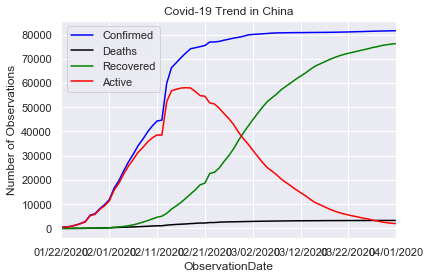

In [17]:
df_china.plot(kind='line',x='ObservationDate',
              y=['Confirmed','Deaths','Recovered','Active'],
              color = ['blue','black','green','red'])

plt.title('Covid-19 Trend in China')
plt.ylabel('Number of Observations')
plt.show()

In [18]:
# Calculating Death, Active, and Recovery Percentage for China
active_percentage = round((df_china['Active'].sum())/(df_china['Confirmed'].sum())* 100,2)
recovery_percentage = round((df_china['Recovered'].sum())/(df_china['Confirmed'].sum())* 100,2)
death_percentage = round((df_china['Deaths'].sum())/(df_china['Confirmed'].sum())* 100,2)
print(f"In China, since 03/05/20, Active Cases and Recovery Percentage is {active_percentage}%, {recovery_percentage}% respectively and Death Rate is {death_percentage}%.")

In China, since 03/05/20, Active Cases and Recovery Percentage is 38.75%, 57.76% respectively and Death Rate is 3.5%.


##### Key Takeaways:
*  Number of confirmed cases continues to grow sharply from 01/22/20 to the end for Feburary.It then starts    level off the first week of March
*  Number of Deaths are steadily increasing from 1/22/20 - 4/01/20. It continues increading even when the confirmed cases are stablized. It can be inferred that the previous confirmed cases were not be able to recovered.
*  The recovery rate in the first 10 days is zero.But after that it increase sharply, and continue to grow. China did very well in fighting the virus
*  Active cases went down sharply from middle of March.This is very easy to explain. Since the confirmed cases are stable, the recovery rate is increase sharply; therefore active cases drop dramatically.
* Active Cases and Recovery Percentage is 38.75%, 57.76% respectively and Death Rate is 3.5%.
* China did very good job in handling the pandemic. Since the first week of March, confirmed cases are stablized, recovered rate are shot up, active cases drop sharply. The other countries should learn the ways China handles the crisis.

In [19]:
df_sKorea = df2[df2['Country/Region'] == 'South Korea']
print(f"Number of records for South Korea are {df_sKorea.shape}")
df_sKorea = df_sKorea.groupby(['ObservationDate']).sum().reset_index()
df_sKorea.head()

Number of records for South Korea are (71, 9)


,ObservationDate,SNo,Confirmed,Deaths,Recovered,Active
0,01/22/2020,38,1.0,0.0,0.0,1.0
1,01/23/2020,76,1.0,0.0,0.0,1.0
2,01/24/2020,122,2.0,0.0,0.0,2.0
3,01/25/2020,163,2.0,0.0,0.0,2.0
4,01/26/2020,209,3.0,0.0,0.0,3.0


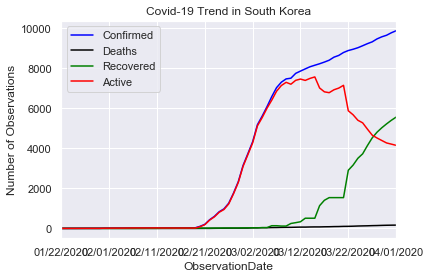

In [20]:
df_sKorea.plot(kind='line',x='ObservationDate',
              y=['Confirmed','Deaths','Recovered','Active'],
              color = ['blue','black','green','red'])
plt.title('Covid-19 Trend in South Korea')
plt.ylabel('Number of Observations')
plt.show()

In [45]:
# Calculating Death, Active, and Recovery Percentage in South Korea

active_percentage = round((df_sKorea['Active'].sum())/(df_sKorea['Confirmed'].sum())* 100,2)
recovery_percentage = round((df_sKorea['Recovered'].sum())/(df_sKorea['Confirmed'].sum())* 100,2)
death_percentage = round((df_sKorea['Deaths'].sum())/(df_sKorea['Confirmed'].sum())* 100,2)
print(f"In South Korea Active Cases and Recovery Percentage is {active_percentage}%, {recovery_percentage}% respectively and Death Rate is {death_percentage}%.")

In South Korea Active Cases and Recovery Percentage is 76.42%, 22.52% respectively and Death Rate is 1.07%.


##### Key Takeaways:
* There is a sudden surge in confirmed and active cases starts on 2/21/20 in South Korea
* Confirmed cases are continuing growth since 1/21/20
* Active cases follow the same trend as confirmcases. However, it gradually decreases due to the increase of recovered cases
* Confirmed cases continue to rise means transmited rate is high - highly contagious. Recovered cases increase sharply indicating good intervention here either by medicine or social distacing or both. 
* Death rate is 1.07 % compares to 3.86% in China
* South Korea has been well prepared for the pandemic !

In [22]:
df_italy = df2[df2['Country/Region'] == 'Italy']
print(f"Number of records for Italy are {df_italy.shape}")
df_italy = df_italy.groupby(['ObservationDate']).sum().reset_index()
#df_italy['Week'] = pd.to_datetime(df_italy['ObservationDate'],errors = 'coerce').dt.week
df_italy.head()

Number of records for Italy are (62, 9)


,ObservationDate,SNo,Confirmed,Deaths,Recovered,Active
0,01/31/2020,481,2.0,0.0,0.0,2.0
1,02/01/2020,540,2.0,0.0,0.0,2.0
2,02/02/2020,609,2.0,0.0,0.0,2.0
3,02/03/2020,676,2.0,0.0,0.0,2.0
4,02/04/2020,744,2.0,0.0,0.0,2.0


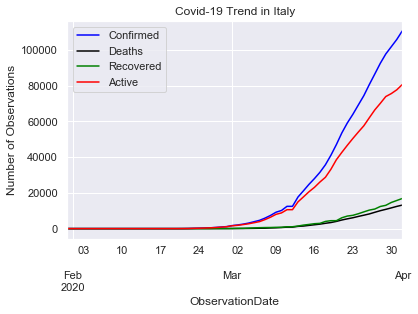

In [38]:
df_italy.plot(kind='line',x='ObservationDate',
              y=['Confirmed','Deaths','Recovered','Active'],
              color = ['blue','black','green','red'])
plt.title('Covid-19 Trend in Italy')
plt.ylabel('Number of Observations')
plt.show()

In [24]:
# Calculating Death, Active, and Recovery Percentage in Italy

active_percentage = round((df_italy['Active'].sum())/(df_italy['Confirmed'].sum())* 100,2)
recovery_percentage = round((df_italy['Recovered'].sum())/(df_italy['Confirmed'].sum())* 100,2)
death_percentage = round((df_italy['Deaths'].sum())/(df_italy['Confirmed'].sum())* 100,2)
print(f"In Italy, Active Cases and Recovery Percentage is {active_percentage}%, {recovery_percentage}% respectively and Death Rate is {death_percentage}%.")

In Italy, Active Cases and Recovery Percentage is 77.86%, 12.33% respectively and Death Rate is 9.81%.


##### Key Takeaways:
* In Italy,there isn't any report cases from 1/31/20 to 4/1/20
* There is a sudden surge for all status: confirmed,active deatth and recovery cases
* Death rate and recovery rate are almost identical: 9.811% & 12.33% respectively. An alarming rate !
* Trending is different than China

In [25]:
df_USA = df2[df2['Country/Region'] == 'US']
print(f"Number of records for USA are {df_USA.shape}")
df_USA = df_USA.groupby(['ObservationDate']).sum().reset_index()
df_USA.head()

Number of records for USA are (2208, 9)


,ObservationDate,SNo,Confirmed,Deaths,Recovered,Active
0,01/22/2020,32,1.0,0.0,0.0,1.0
1,01/23/2020,70,1.0,0.0,0.0,1.0
2,01/24/2020,237,2.0,0.0,0.0,2.0
3,01/25/2020,319,2.0,0.0,0.0,2.0
4,01/26/2020,818,5.0,0.0,0.0,5.0


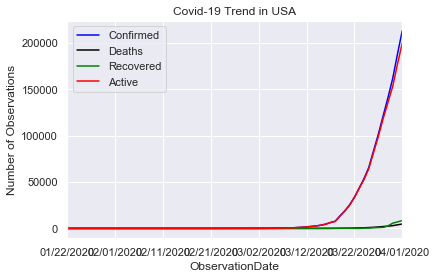

In [26]:
df_USA.plot(kind='line',x='ObservationDate',
              y=['Confirmed','Deaths','Recovered','Active'],
              color = ['blue','black','green','red'])
plt.title('Covid-19 Trend in USA')
plt.ylabel('Number of Observations')
plt.show()

In [40]:
# Calculating Death, Active, and Recovery Percentage in the USA

active_percentage = round((df_USA['Active'].sum())/(df_USA['Confirmed'].sum())* 100,2)
recovery_percentage = round((df_USA['Recovered'].sum())/(df_USA['Confirmed'].sum())* 100,2)
death_percentage = round((df_USA['Deaths'].sum())/(df_USA['Confirmed'].sum())* 100,2)
print(f"In the USA Active Cases and Recovery Percentage is {active_percentage}%, {recovery_percentage}% respectively and Death Rate is {death_percentage}%.")

In the USA Active Cases and Recovery Percentage is 96.09%, 2.15% respectively and Death Rate is 1.77%.


##### Key Takeaways:
* There aren't any report about the outbreak until 2/21/20
* There is a huge surge in confirmed cases and active cases starting at the beginning of March
* Confirmed and active cases are almost identical
* There is a subtle increase in death rate compare to recovered rate on 3/12/20
* Actice cases are huge - 96.09%, recovered: 2.15% and death rate is 1.77%. 
* USA must do something to control the situation

In [41]:
df_Spain = df2[df2['Country/Region'] == 'Spain']
print(f"Number of records in Spain are {df_Spain.shape}")
df_Spain = df_Spain.groupby(['ObservationDate']).sum().reset_index()
#df_italy['Week'] = pd.to_datetime(df_italy['ObservationDate'],errors = 'coerce').dt.week
df_Spain.head()

Number of records in Spain are (61, 9)


,ObservationDate,SNo,Confirmed,Deaths,Recovered,Active
0,02/01/2020,552,1.0,0.0,0.0,1.0
1,02/02/2020,619,1.0,0.0,0.0,1.0
2,02/03/2020,688,1.0,0.0,0.0,1.0
3,02/04/2020,758,1.0,0.0,0.0,1.0
4,02/05/2020,828,1.0,0.0,0.0,1.0


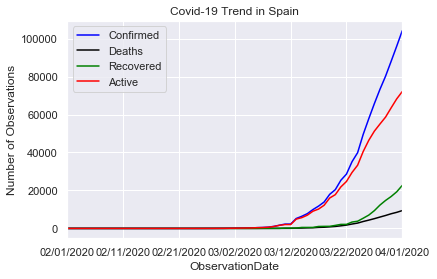

In [42]:
df_Spain.plot(kind='line',x='ObservationDate',
              y=['Confirmed','Deaths','Recovered','Active'],
              color = ['blue','black','green','red'])
plt.title('Covid-19 Trend in Spain')
plt.ylabel('Number of Observations')
plt.show()

In [43]:
# Calculating Death, Active, and Recovery Percentage in the Spain

active_percentage = round((df_Spain['Active'].sum())/(df_Spain['Confirmed'].sum())* 100,2)
recovery_percentage = round((df_Spain['Recovered'].sum())/(df_Spain['Confirmed'].sum())* 100,2)
death_percentage = round((df_Spain['Deaths'].sum())/(df_Spain['Confirmed'].sum())* 100,2)
print(f"In Spain, since 02/21/20, Active Cases and Recovery Percentage is {active_percentage}%, {recovery_percentage}% respectively and Death Rate is {death_percentage}%.")

In Spain, since 02/21/20, Active Cases and Recovery Percentage is 77.58%, 14.87% respectively and Death Rate is 7.55%.


##### Key Takeaways:
* There is a straight up surge in confirmed and active cases in Spain beginging on 3/12/20
* Confirmed cases and active cases are almost the same, meaning much less recovered cases
* Deaths rate and recovered rate both increase at the beginning of the second week in March
* Active cases 77.58%, recovered cases: 14.87%, and death rate: 7.55%

In [44]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['Confirmed'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_sKorea['ObservationDate'], y=df_sKorea['Confirmed'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['Confirmed'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['Confirmed'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_Spain['ObservationDate'], y=df_Spain['Confirmed'],
                    mode='lines+markers',name='Spain'))
fig.update_layout(title_text='Confirmed Cases Across Countries',xaxis_title='Date',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

In [32]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['Recovered'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_sKorea['ObservationDate'], y=df_sKorea['Recovered'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['Recovered'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['Recovered'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_Spain['ObservationDate'], y=df_Spain['Recovered'],
                    mode='lines+markers',name='Spain'))
fig.update_layout(title_text='Recovered Cases Across Countries',xaxis_title='Date',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

In [33]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['ObservationDate'], y=df_china['Deaths'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_sKorea['ObservationDate'], y=df_sKorea['Deaths'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['ObservationDate'], y=df_italy['Deaths'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['ObservationDate'], y=df_USA['Deaths'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_Spain['ObservationDate'], y=df_Spain['Deaths'],
                    mode='lines+markers',name='Spain'))
fig.update_layout(title_text='Deaths Cases Across Countries',xaxis_title='Date',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

In [34]:
df_china['ObservationDate'] = pd.to_datetime(df_china['ObservationDate'])
df_china['week'] = df_china['ObservationDate'].dt.week
df_sKorea['ObservationDate'] = pd.to_datetime(df_sKorea['ObservationDate'])
df_sKorea['week'] = df_sKorea['ObservationDate'].dt.week
df_USA['ObservationDate'] = pd.to_datetime(df_USA['ObservationDate'])
df_USA['week'] = df_USA['ObservationDate'].dt.week
df_italy['ObservationDate'] = pd.to_datetime(df_italy['ObservationDate'])
df_italy['week'] = df_italy['ObservationDate'].dt.week
df_Spain['ObservationDate'] = pd.to_datetime(df_Spain['ObservationDate'])
df_Spain['week'] = df_Spain['ObservationDate'].dt.week

In [35]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['week'], y=df_china['Confirmed'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_sKorea['week'], y=df_sKorea['Confirmed'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['week'], y=df_italy['Confirmed'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['week'], y=df_USA['Confirmed'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_Spain['week'], y=df_Spain['Confirmed'],
                    mode='lines+markers',name='Spain'))
fig.update_layout(title_text='Confirmed Cases Across Countries',xaxis_title='Number of Weeks',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

In [36]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['week'], y=df_china['Deaths'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_sKorea['week'], y=df_sKorea['Deaths'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['week'], y=df_italy['Deaths'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['week'], y=df_USA['Deaths'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_Spain['week'], y=df_Spain['Deaths'],
                    mode='lines+markers',name='Spain'))
fig.update_layout(title_text='Deaths Cases Across Countries',xaxis_title='Number of Weeks',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()

In [37]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_china['week'], y=df_china['Active'],
                    mode='lines+markers',name='China'))
fig.add_trace(go.Scatter(x=df_sKorea['week'], y=df_sKorea['Active'],
                    mode='lines+markers',name='South Korea'))
fig.add_trace(go.Scatter(x=df_italy['week'], y=df_italy['Active'],
                    mode='lines+markers',name='Italy'))
fig.add_trace(go.Scatter(x=df_USA['week'], y=df_USA['Active'],
                    mode='lines+markers',name='USA'))
fig.add_trace(go.Scatter(x=df_Spain['week'], y=df_Spain['Active'],
                    mode='lines+markers',name='Spain'))
fig.update_layout(title_text='Active Cases Across Countries',xaxis_title='Number of Weeks',yaxis_title='Number of Cases',plot_bgcolor='rgb(250, 242, 242)', font=dict(
        family="Courier New, monospace",
        size=18,
    ))

fig.show()